In [4]:
# Importo librerías.
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# Cargo el archivo CSV
data = pd.read_csv('EDA.csv')

In [6]:
#Visualizamos las columnas resultantes de la unión de los 3 datasets.
data.head(2)

,user_id,user_url,item_id,recommend,review,sentiment_analysis,year_review,item_name,playtime_forever,publisher,genres,app_name,reviews_url,price,year_game
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,True,Simple yet with great replayability. In my opi...,2,2011,Killing Floor,10006.0,Tripwire Interactive,Action,Killing Floor,http://steamcommunity.com/app/1250/reviews/?br...,19.99,2009
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,True,It's unique and worth a playthrough.,2,2011,Zeno Clash,271.0,ACE Team,Action,Zeno Clash,http://steamcommunity.com/app/22200/reviews/?b...,9.99,2009


In [7]:
# Resumen Estadístico
print(data.describe())

             item_id  sentiment_analysis   year_review  playtime_forever
count   49186.000000        49186.000000  49186.000000      43402.000000
mean   155534.957061            1.347253   2014.150205       2455.331598
std    124549.146739            0.755326      0.841830       6243.369536
min        10.000000            0.000000   2010.000000          0.000000
25%      6900.000000            1.000000   2014.000000         46.000000
50%    209090.000000            2.000000   2014.000000        229.000000
75%    248515.000000            2.000000   2015.000000       1005.000000
max    428880.000000            2.000000   2015.000000     141766.000000


Primer EDA Grafico de Sentiment_analysis
Este grafico se centrara en visualizar la frecuencia del sentiment_analysis que se realizo.

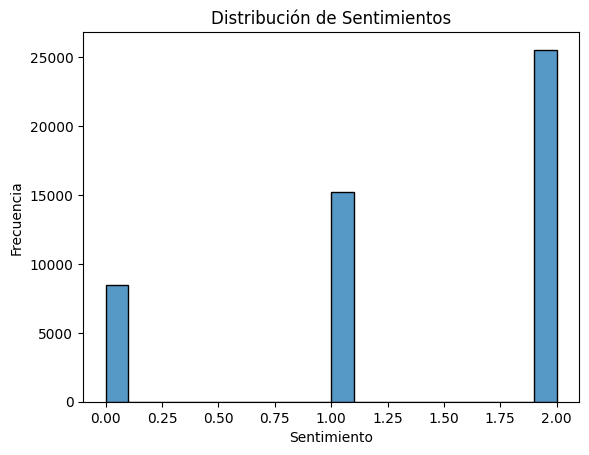

In [8]:
"""Visualización para sentiment_analysis"""
#Importo librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Realizo un histograma de las calificaciones de sentimiento (0, 1 y 2)
sns.histplot(data['sentiment_analysis'], bins=20)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


In [12]:
# En la columna price hay ciertos string así que los voy a pasar a 0.0
data.price = data.price.replace({'Free To Play':'0.0', 'Free to Play':'0.0', 'Free':'0.0', 'Free Demo':'0.0', 'Play for Free!':'0.0', 
                                'Install Now': '0.0', 'Play WARMACHINE: Tactics Demo':'0.0', 'Free Mod':'0.0', 'Install Theme':'0.0',
                                'Third-party':'0.0', 'Play Now':'0.0', 'Free HITMAN™ Holiday Pack':'0.0', 'Play the Demo':'0.0',
                                'Starting at $499.00':'0.0', 'Starting at $449.00':'0.0', 'Free to Try':'0.0', 'Free Movie':'0.0', 'Free to Use':'0.0'})

In [25]:
# Convierto a flotante
data['price']=data['price'].astype('float64')

Ver la cantidad de juegos con diferentes generos
Este se centrara en ver la cantidad de juegos creados, el genero mas popular creado y el menos popular

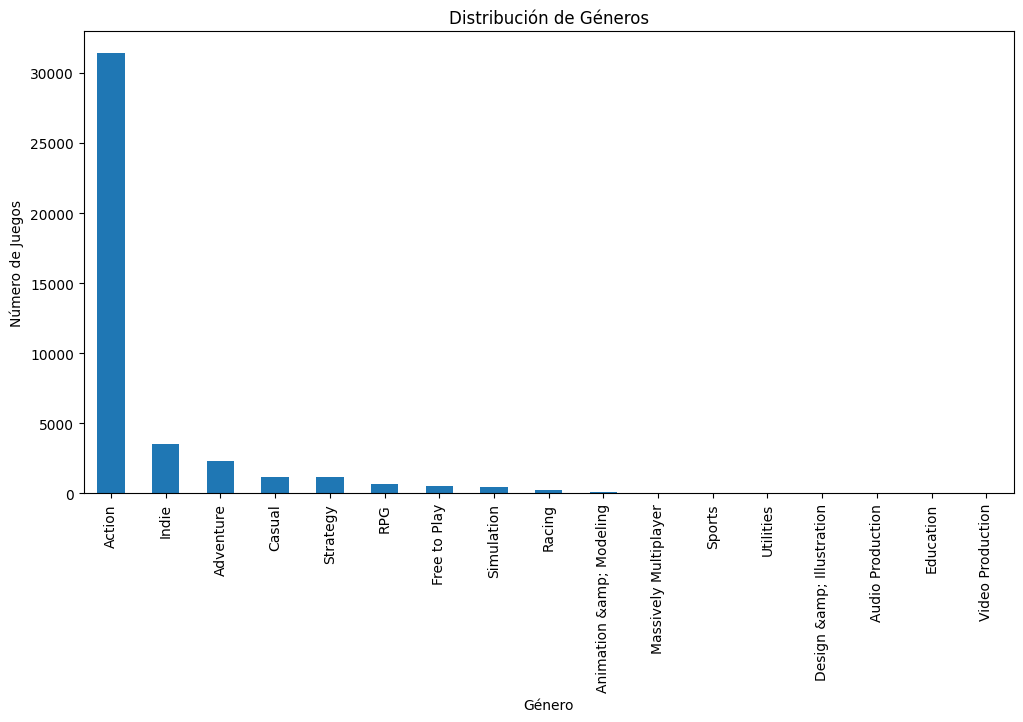

In [13]:
# Contamos la frecuencia de cada género
genre_counts = data['genres'].value_counts()
# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=90)
plt.show()

Precio mas usados regularmente

In [26]:
price_counts = data['price'].value_counts()

In [27]:
top_prices = price_counts.head(10)


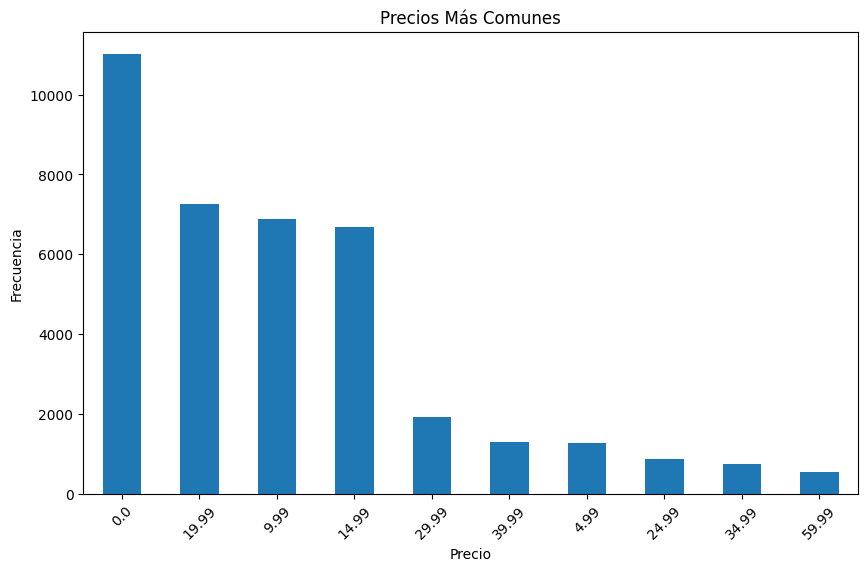

In [16]:
plt.figure(figsize=(10, 6))
top_prices.plot(kind='bar')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Precios Más Comunes')
plt.xticks(rotation=45)
plt.show()


Ahora voy a ver la frecuencia de los editores que publican los juegos

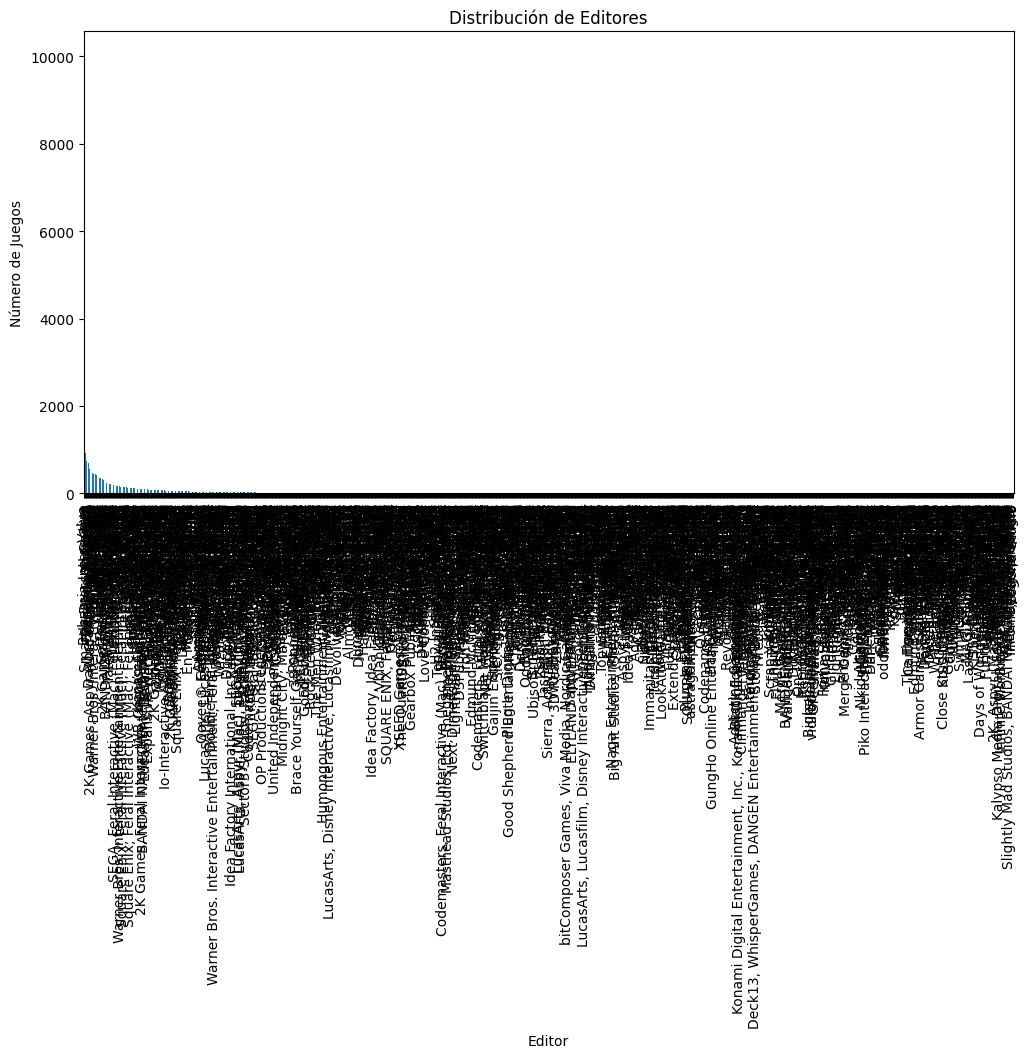

In [17]:
# Contamos la frecuencia de cada editor
publisher_counts = data['publisher'].value_counts()

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
publisher_counts.plot(kind='bar')
plt.title('Distribución de Editores')
plt.xlabel('Editor')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=90)
plt.show()

Aca datos mas detallados sobre los publisher

In [18]:
publisher_counts

publisher
Valve                    10069
Bohemia Interactive       1034
Smartly Dressed Games      916
Ubisoft                    738
Re-Logic                   714
                         ...  
Alex Zhang                   1
ALLPlayer Group Ltd.         1
Sebastian Nigro              1
IllFonic, Psyop Games        1
Legend Studio                1
Name: count, Length: 1200, dtype: int64

In [28]:
#De data obtenemos las variables siguientes para continuar con el EDA
var_seleccionadas = pd.DataFrame(data[['sentiment_analysis', 'playtime_forever', 'item_name', 'price']])

In [29]:
# Verifico cuantos nulos tiene cada variable
var_seleccionadas.isna().sum()

sentiment_analysis       0
playtime_forever      5784
item_name             5784
price                 7964
dtype: int64

In [30]:
'''
Podemos ver que:
- sentiment_analysis tiene 0 nulos
- La única variables categórica tiene 5784 nulos, menos que price. 
Sin embargo, al ser categórica voy a reducir las filas al nivel de item_name.
Debido a que no puedo promediar valores categóricos pero sí el precio.
'''
# Elimino filas vacias a nivel de app_name

var_seleccionadas = var_seleccionadas.dropna(subset=['item_name'])
var_seleccionadas

,sentiment_analysis,playtime_forever,item_name,price
0,2,10006.0,Killing Floor,19.99
1,2,271.0,Zeno Clash,9.99
2,1,834.0,Metro 2033,NaN
3,2,84.0,Barbieâ¢ Dreamhouse Partyâ¢,NaN
4,1,551.0,Euro Truck Simulator 2,19.99
...,...,...,...,...
49181,1,23532.0,Counter-Strike: Global Offensive,14.99
49182,2,0.0,Enclave,4.99
49183,0,23532.0,Counter-Strike: Global Offensive,14.99
49184,2,23532.0,Counter-Strike: Global Offensive,14.99


In [31]:
# Reseteo el índice
var_seleccionadas.reset_index(drop=True, inplace=True)
# Volvemos a verificar cuantos nulos tiene cada variable
var_seleccionadas.isna().sum()

sentiment_analysis       0
playtime_forever         0
item_name                0
price                 6200
dtype: int64

In [32]:
'''
Rellenamos los valores faltantes usando playtime_forever y price
'''
# Calculo los promedios
# Obtengo columnas nuevas para hacer un dropna y luego obtener la media
mean_playtime = var_seleccionadas.dropna(subset=['playtime_forever'])
mean_price = var_seleccionadas.dropna(subset=['price'])

In [33]:
mean_play = mean_playtime['playtime_forever'].mean()
mean_pr = mean_price['price'].mean()
print(mean_play)
print(mean_pr)

2455.3315976222293
14.620766356647492


In [34]:
# Lleno NaN en 'playtime_forever' con su promedio
var_seleccionadas['playtime_forever'].fillna(mean_play, inplace=True)

# Lleno NaN en 'price' con su promedio
var_seleccionadas['price'].fillna(mean_pr, inplace=True)

In [35]:
var_seleccionadas

,sentiment_analysis,playtime_forever,item_name,price
0,2,10006.0,Killing Floor,19.990000
1,2,271.0,Zeno Clash,9.990000
2,1,834.0,Metro 2033,14.620766
3,2,84.0,Barbieâ¢ Dreamhouse Partyâ¢,14.620766
4,1,551.0,Euro Truck Simulator 2,19.990000
...,...,...,...,...
43397,1,23532.0,Counter-Strike: Global Offensive,14.990000
43398,2,0.0,Enclave,4.990000
43399,0,23532.0,Counter-Strike: Global Offensive,14.990000
43400,2,23532.0,Counter-Strike: Global Offensive,14.990000


In [36]:
# Resumen Estadístico de var_selecionadas
print(var_seleccionadas.describe())

       sentiment_analysis  playtime_forever         price
count        43402.000000      43402.000000  43402.000000
mean             1.336713       2455.331598     14.620766
std              0.761618       6243.369536     13.362857
min              0.000000          0.000000      0.000000
25%              1.000000         46.000000      9.990000
50%              2.000000        229.000000     14.620766
75%              2.000000       1005.000000     19.990000
max              2.000000     141766.000000    771.710000


In [37]:
from sklearn.preprocessing import StandardScaler

# Selecciono las columnas cuantitativas
columns_to_normalize = ['sentiment_analysis', 'playtime_forever', 'price']
df_quantitative = var_seleccionadas[columns_to_normalize]

In [38]:
# Creo un objeto StandardScaler
scaler = StandardScaler()

# Transformo los datos cuantitativos
df_quantitative_normalized = scaler.fit_transform(df_quantitative)

# Creo un DataFrame con las columnas normalizadas
df_quantitative_normalized = pd.DataFrame(df_quantitative_normalized, columns=columns_to_normalize)

# Agregar la columna 'app_name' nuevamente al DataFrame normalizado
df_normalized = pd.concat([df_quantitative_normalized, var_seleccionadas['item_name']], axis=1)

# Mostrar las primeras filas del DataFrame normalizado
print(df_normalized.head())

   sentiment_analysis  playtime_forever         price  \
0            0.870902          1.209404  4.018075e-01   
1            0.870902         -0.349868 -3.465441e-01   
2           -0.442107         -0.259692 -2.658679e-16   
3            0.870902         -0.379820 -2.658679e-16   
4           -0.442107         -0.305020  4.018075e-01   

                       item_name  
0                  Killing Floor  
1                     Zeno Clash  
2                     Metro 2033  
3  Barbieâ¢ Dreamhouse Partyâ¢  
4         Euro Truck Simulator 2  


In [39]:
# Eliminamos caracteres no alfanuméricos de la columna 'item_name'
df_normalized['item_name'] = df_normalized['item_name'].str.replace(r'[^a-zA-Z0-9\s]', '')
df_normalized

,sentiment_analysis,playtime_forever,price,item_name
0,0.870902,1.209404,4.018075e-01,Killing Floor
1,0.870902,-0.349868,-3.465441e-01,Zeno Clash
2,-0.442107,-0.259692,-2.658679e-16,Metro 2033
3,0.870902,-0.379820,-2.658679e-16,Barbieâ¢ Dreamhouse Partyâ¢
4,-0.442107,-0.305020,4.018075e-01,Euro Truck Simulator 2
...,...,...,...,...
43397,-0.442107,3.375887,2.763166e-02,Counter-Strike: Global Offensive
43398,0.870902,-0.393275,-7.207199e-01,Enclave
43399,-1.755116,3.375887,2.763166e-02,Counter-Strike: Global Offensive
43400,0.870902,3.375887,2.763166e-02,Counter-Strike: Global Offensive


In [40]:
# Reemplazamos el carácter "â¢" por una cadena vacía en la columna 'item_name'
df_normalized['item_name'] = df_normalized['item_name'].str.replace('â¢', '')
df_normalized

,sentiment_analysis,playtime_forever,price,item_name
0,0.870902,1.209404,4.018075e-01,Killing Floor
1,0.870902,-0.349868,-3.465441e-01,Zeno Clash
2,-0.442107,-0.259692,-2.658679e-16,Metro 2033
3,0.870902,-0.379820,-2.658679e-16,Barbie Dreamhouse Party
4,-0.442107,-0.305020,4.018075e-01,Euro Truck Simulator 2
...,...,...,...,...
43397,-0.442107,3.375887,2.763166e-02,Counter-Strike: Global Offensive
43398,0.870902,-0.393275,-7.207199e-01,Enclave
43399,-1.755116,3.375887,2.763166e-02,Counter-Strike: Global Offensive
43400,0.870902,3.375887,2.763166e-02,Counter-Strike: Global Offensive


In [41]:
#vemos cuantos valores únicos tiene item name, para saber si haremos un one hot encoding con esta columna. Obtamos por no hacerlo.
df_normalized['item_name'].nunique()

2640

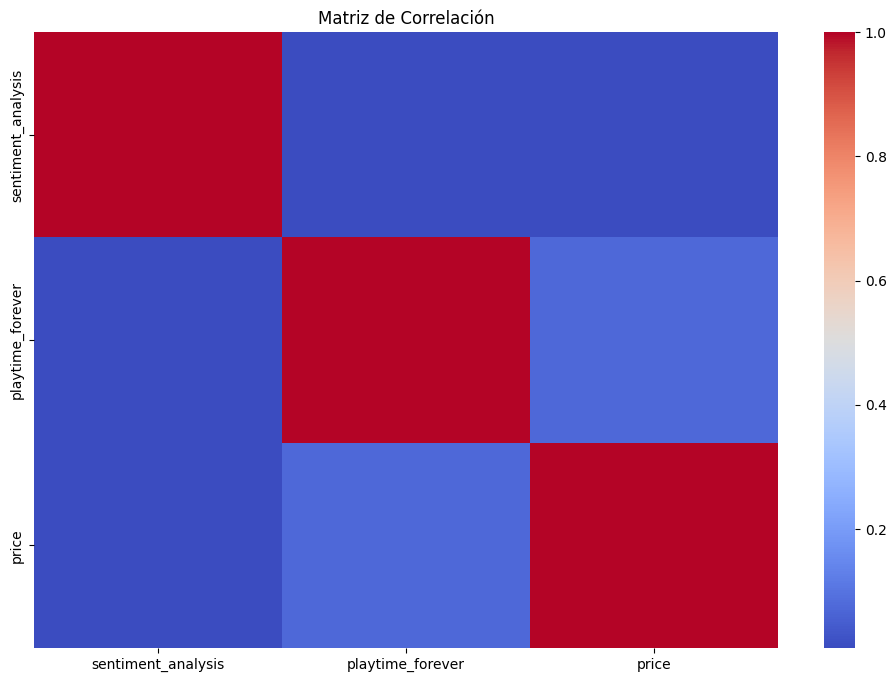

In [42]:
#Hago la correlación
# Seleccionar las columnas de interés
columnas = ['sentiment_analysis', 'playtime_forever', 'price']
correlation_matrix = df_normalized[columnas].corr()
#Visualizo la correlación
# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

*Se puede observar que entre variables existe una baja correlacion entonces decidi hacer un sistema de recomendación con la similitud del coseno, la cual vectoriza los valores de las variables que incluiremos para nuestro modelo*


In [43]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('EDA.csv')

In [46]:
# Eliminar caracteres no alfanuméricos de la columna 'item_name'
data['item_name'] = data['item_name'].str.replace(r'[^a-zA-Z0-9\s]', '')
# Reemplazar el carácter "â¢" por una cadena vacía en la columna 'item_name'
data['item_name'] = data['item_name'].str.replace('â¢', '')
data

,user_id,user_url,item_id,recommend,review,sentiment_analysis,year_review,item_name,playtime_forever,publisher,genres,app_name,reviews_url,price,year_game
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,True,Simple yet with great replayability. In my opi...,2,2011,Killing Floor,10006.0,Tripwire Interactive,Action,Killing Floor,http://steamcommunity.com/app/1250/reviews/?br...,19.99,2009
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,True,It's unique and worth a playthrough.,2,2011,Zeno Clash,271.0,ACE Team,Action,Zeno Clash,http://steamcommunity.com/app/22200/reviews/?b...,9.99,2009
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,True,Great atmosphere. The gunplay can be a bit chu...,1,2011,Metro 2033,834.0,NaN,NaN,NaN,NaN,NaN,NaN
3,js41637,http://steamcommunity.com/id/js41637,251610,True,I know what you think when you see this title ...,2,2014,Barbie Dreamhouse Party,84.0,NaN,NaN,NaN,NaN,NaN,NaN
4,js41637,http://steamcommunity.com/id/js41637,227300,True,For a simple (it's actually not all that simpl...,1,2013,Euro Truck Simulator 2,551.0,SCS Software,Indie,Euro Truck Simulator 2,http://steamcommunity.com/app/227300/reviews/?...,19.99,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49181,wayfeng,http://steamcommunity.com/id/wayfeng,730,True,its FUNNNNNNNN,1,2015,Counter-Strike: Global Offensive,23532.0,Valve,Action,Counter-Strike: Global Offensive,http://steamcommunity.com/app/730/reviews/?bro...,14.99,2012
49182,76561198251004808,http://steamcommunity.com/profiles/76561198251...,253980,True,Awesome fantasy game if you don't mind the gra...,2,2015,Enclave,0.0,Topware Interactive,RPG,Enclave,http://steamcommunity.com/app/253980/reviews/?...,4.99,2003
49183,72947282842,http://steamcommunity.com/id/72947282842,730,True,Prettyy Mad Game,0,2015,Counter-Strike: Global Offensive,23532.0,Valve,Action,Counter-Strike: Global Offensive,http://steamcommunity.com/app/730/reviews/?bro...,14.99,2012
49184,ApxLGhost,http://steamcommunity.com/id/ApxLGhost,730,True,AMAZING GAME 10/10,2,2015,Counter-Strike: Global Offensive,23532.0,Valve,Action,Counter-Strike: Global Offensive,http://steamcommunity.com/app/730/reviews/?bro...,14.99,2012


In [47]:
# Transformo valores string de la columna price
# En la columna price hay ciertos string así que los voy a pasar a 0.0
data.price = data.price.replace({'Free To Play':'0.0', 'Free to Play':'0.0', 'Free':'0.0', 'Free Demo':'0.0', 'Play for Free!':'0.0', 
                                'Install Now': '0.0', 'Play WARMACHINE: Tactics Demo':'0.0', 'Free Mod':'0.0', 'Install Theme':'0.0',
                                'Third-party':'0.0', 'Play Now':'0.0', 'Free HITMAN™ Holiday Pack':'0.0', 'Play the Demo':'0.0',
                                'Starting at $499.00':'0.0', 'Starting at $449.00':'0.0', 'Free to Try':'0.0', 'Free Movie':'0.0', 'Free to Use':'0.0'})
# Convierto a flotante
data['price']=data['price'].astype('float64')

In [48]:
# Elimino filas vacias a nivel de item_name (output)
data = data.dropna(subset=['item_name'])
data

,user_id,user_url,item_id,recommend,review,sentiment_analysis,year_review,item_name,playtime_forever,publisher,genres,app_name,reviews_url,price,year_game
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,True,Simple yet with great replayability. In my opi...,2,2011,Killing Floor,10006.0,Tripwire Interactive,Action,Killing Floor,http://steamcommunity.com/app/1250/reviews/?br...,19.99,2009
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,True,It's unique and worth a playthrough.,2,2011,Zeno Clash,271.0,ACE Team,Action,Zeno Clash,http://steamcommunity.com/app/22200/reviews/?b...,9.99,2009
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,True,Great atmosphere. The gunplay can be a bit chu...,1,2011,Metro 2033,834.0,NaN,NaN,NaN,NaN,NaN,NaN
3,js41637,http://steamcommunity.com/id/js41637,251610,True,I know what you think when you see this title ...,2,2014,Barbie Dreamhouse Party,84.0,NaN,NaN,NaN,NaN,NaN,NaN
4,js41637,http://steamcommunity.com/id/js41637,227300,True,For a simple (it's actually not all that simpl...,1,2013,Euro Truck Simulator 2,551.0,SCS Software,Indie,Euro Truck Simulator 2,http://steamcommunity.com/app/227300/reviews/?...,19.99,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49181,wayfeng,http://steamcommunity.com/id/wayfeng,730,True,its FUNNNNNNNN,1,2015,Counter-Strike: Global Offensive,23532.0,Valve,Action,Counter-Strike: Global Offensive,http://steamcommunity.com/app/730/reviews/?bro...,14.99,2012
49182,76561198251004808,http://steamcommunity.com/profiles/76561198251...,253980,True,Awesome fantasy game if you don't mind the gra...,2,2015,Enclave,0.0,Topware Interactive,RPG,Enclave,http://steamcommunity.com/app/253980/reviews/?...,4.99,2003
49183,72947282842,http://steamcommunity.com/id/72947282842,730,True,Prettyy Mad Game,0,2015,Counter-Strike: Global Offensive,23532.0,Valve,Action,Counter-Strike: Global Offensive,http://steamcommunity.com/app/730/reviews/?bro...,14.99,2012
49184,ApxLGhost,http://steamcommunity.com/id/ApxLGhost,730,True,AMAZING GAME 10/10,2,2015,Counter-Strike: Global Offensive,23532.0,Valve,Action,Counter-Strike: Global Offensive,http://steamcommunity.com/app/730/reviews/?bro...,14.99,2012


In [49]:
#Relleno con medias los valores faltantes de playtime_forever y price
# Calculo los promedios
# Obtengo columnas nuevas para hacer un dropna y luego obtener la media
mean_playtime = data.dropna(subset=['playtime_forever'])
mean_price = data.dropna(subset=['price'])

In [50]:
mean_play = mean_playtime['playtime_forever'].mean()
mean_pr = mean_price['price'].mean()
print(mean_play)
print(mean_pr)

2455.3315976222293
14.620766356647492


In [51]:
# Lleno NaN en 'playtime_forever' con su promedio
data['playtime_forever'].fillna(mean_play, inplace=True)

# Lleno NaN en 'price' con su promedio
data['price'].fillna(mean_pr, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2808\1939997746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['playtime_forever'].fillna(mean_play, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2808\1939997746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].fillna(mean_pr, inplace=True)


In [52]:
#Reseteo el index
data.reset_index(drop=True, inplace=True)

In [53]:
#Guardamos nuestro archivo a un csv, este es el cual utilizaremos para hacer las 5 primeras funciones.
data.to_csv('EDA2.csv', index=False)

In [54]:
#abrimos el csv para realizar el sistema de recomendación (6ta función)
data = pd.read_csv('EDA2.csv')

In [55]:
from sklearn.preprocessing import StandardScaler
# Creamos una matriz que incluye géneros, sentiment_analysis y precio
features = pd.concat([pd.get_dummies(data['genres'], prefix='genre'),
                      data['sentiment_analysis'],
                      data['price']], axis=1)

# Normalizamos las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculamos la similitud del coseno entre los juegos
cosine_sim = cosine_similarity(scaled_features, scaled_features)

In [56]:
# Agrego las columnas "item_id" e "item_name" a features
features["item_id"] = data["item_id"]
features["item_name"] = data["item_name"]

# Verifico el resultado
print(features.head())

   genre_Action  genre_Adventure  genre_Animation &amp; Modeling  \
0          True            False                           False   
1          True            False                           False   
2         False            False                           False   
3         False            False                           False   
4         False            False                           False   

   genre_Audio Production  genre_Casual  genre_Design &amp; Illustration  \
0                   False         False                            False   
1                   False         False                            False   
2                   False         False                            False   
3                   False         False                            False   
4                   False         False                            False   

   genre_Education  genre_Free to Play  genre_Indie  \
0            False               False        False   
1            False      

In [57]:
#Ahora tenemos nuestro archivo para el sistema de recomendación (hacemos esto para optimizar recursos, ya que la lectura de un csv y hacer nuevas transformaciones relentiza en el fastapi y no se ejecuta correctamente)
features.to_csv('Archivo_SCoseno.csv', index=False)